In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install PIL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [12]:
from PIL import Image

image1 = Image.open('/content/drive/MyDrive/dacon (1)/0.png')
image2 = Image.open('/content/drive/MyDrive/dacon (1)/1.png')
image3 = Image.open('/content/drive/MyDrive/dacon (1)/2.png')
image4 = Image.open('/content/drive/MyDrive/dacon (1)/3.png')

우리가 지난 시간 공부했던 GAN은 Loss Function으로 **sigmoid cross entropy**를 사용합니다. 

하지만 sigmoid를 사용함으로써 GAN은 학습 과정에서 진짜 이미지로 분류되었지만 실제 데이터와는 거리가 먼 가짜 샘플들에 대해** vanishing gradient** 문제가 발생하는데요!

오늘 우리가 공부하게 될 **LSGAN**은 Discriminator가 **Least squares loss function**을 사용하는 모델로,

decision boundary로의 거리에 따라서 패널티를 부여하기 때문에 vanishing gradient 현상을 완화시켜 주는 것이 큰 특징입니다. 

GAN보다 질 좋은 이미지 생성이 가능하고 학습이 안정적이며, batch normalization 과정이 없이 좋은 성능을 보이기도 합니다.

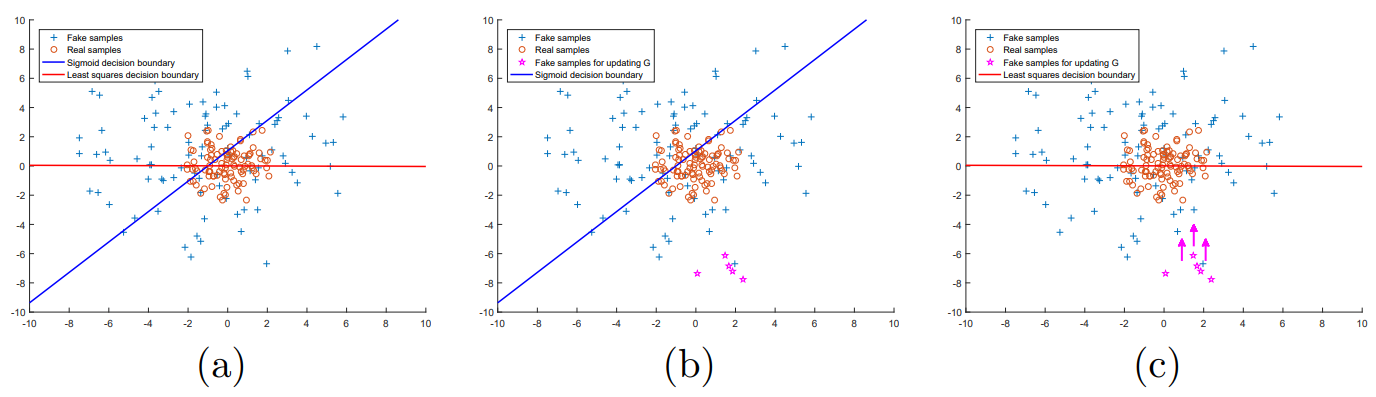

In [13]:
image1

위 그래프에서 파란색 + 표시는 Fake samples, 주황색 o 표시는 real samples를 나타내고 파란 선은 sigmoid decision boundary, 빨간 선은 LSGAN에서 쓰이는 Least Squares decision boundary를 나타냅니다. 그리고 분홍색의 ☆ 표시는 가짜 데이터지만 real samples로 분류된 데이터를 나타냅니다.

(a) 성공적인 GAN의 학습을 위해서는 decision boundary가 real samples의 분포를 가로질러야 합니다. 해당 그래프에서 두 boundary 모두 real samples의 분포를 가로지르고 있습니다.

(b) sigmoid decision boundary만을 나타낸 모습입니다. Discriminator는 파란 decision boundary를 기준으로 위는 가짜 아래는 진짜로 판단합니다. 별 데이터에 한해서 Generator는 Discriminator를 잘 속이고 있다고 볼 수 있겠으나, GAN의 목적은 Generator의 성능을 올리는 데에만 국한되어 있지 않습니다. real samples과 최대한 분포가 비슷해야 실제로 우리가 확인했을 때 real data와 가장 비슷한 결과가 나오기 때문입니다. 

(c) Least Squares decision boundary만을 나타낸 모습입니다. 이 decision boundary로 인해서 별 데이터들은 real samples와 먼 거리에 있을수록 패널티를 받고 점점 real samples와 거리가 가까워지게 됩니다. 그렇게 된다면 Discriminator를 잘 속일 수 있을 뿐만 아니라 real data와 아주 비슷한 결과가 나올 수 있습니다!

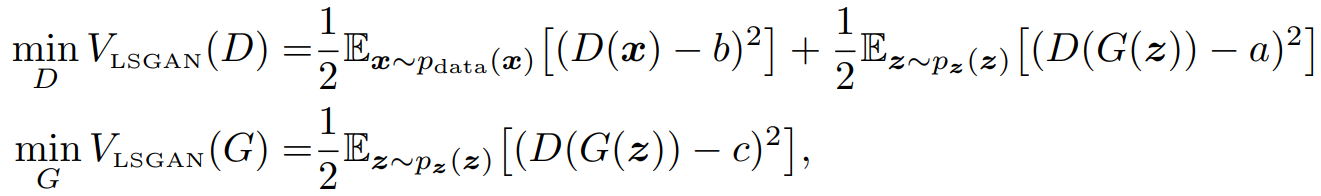

In [14]:
image2

LSGAN은 Regular GAN의 objective function에 a-b coding을 추가로 사용합니다.

a : fake data label
b : real data label
c : Generator의 입장에서 Discriminator가 가짜 데이터를 보고 진짜라고 믿기를 원하는 값

min problem들이 최소값이 되기 위해서는 제곱이 되는 값들이 모두 0이 되어야 합니다.
따라서 $D(x)→b, D(G(z))→a$ 에 가까워질수록 값이 작아집니다.

GAN과는 다르게 LSGAN은 크게 두 장점이 있습니다.

(편의상 가짜 데이터임에도 불구하고 진짜 데이터라고 분류되었지만 진짜 데이터와는 거리가 먼 데이터를 *‘거짓말하는 데이터’*라고 부르겠습니다!)

**첫 번째**, 거짓말하는 데이터에게 거의 패널티를 부여하지 않는 GAN과 달리 LSGAN은 그 데이터가 진짜 데이터로 분류되었음에도 패널티를 부여합니다. 

Generator를 update할 때 Discriminator의 parameter도 함께 수정되어서 위에서 확인했던 decision boundary가 수정됩니다. 결과적으로 부여된 패널티는 Generator가 real data의 분포와 가까운 sample을 생성해내도록 돕습니다. 

**두 번째**, 거짓말하는 데이터에게 패널티를 부과하면 Generator를 update할 때 더 큰 기울기를 나타내기 때문에 vanishing gradient 현상을 완화시켜 줄 수 있습니다.

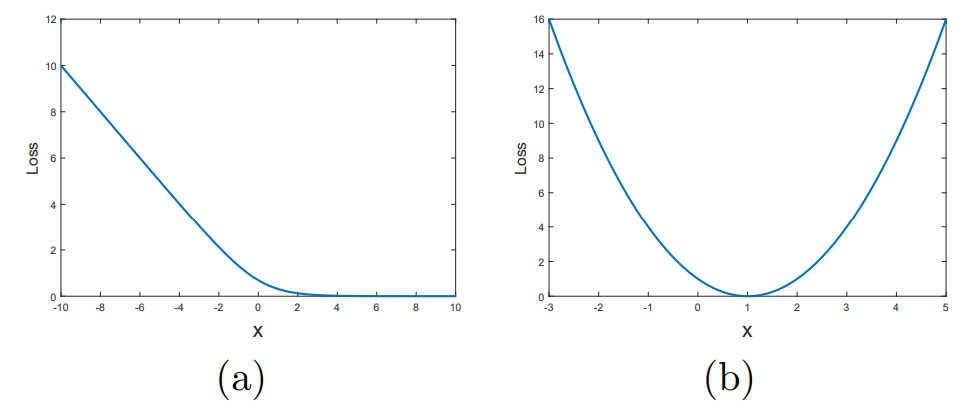

In [16]:
image3

위 그림에서 (a)는 sigmoid cross entropy loss function, (b)는 Least Squares loss function입니다.

(a)에서는 x가 상대적으로 커지는 순간부터 Loss가 flat해지는데, 잘못 분류된 data에도 패널티를 부여하지 않는다는 것을 확인할 수 있습니다.

그러나 (b)에서 Least Square loss function은 1을 제외한 모든 x에게 패널티를 부여하는 것을 확인할 수 있습니다. 

이 장점으로 인해 LSGAN은 보다 안정적인 학습 과정을 수행할 수 있습니다.

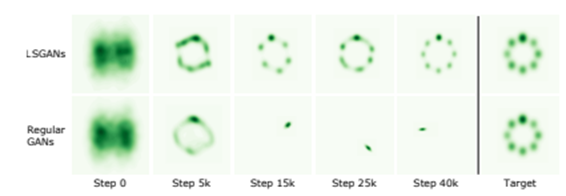

In [17]:
image4

다음은 가우스 커널 밀도를 추정하는 실험의 진행 과정을 나타낸 사진입니다.

Regular GAN은 step 15k부터 데이터 분포가 한 곳으로 몰리는 반면 LSGAN은 데이터의 혼합된 분포를 성공적으로 학습할 수 있었습니다!